In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from fitter import Fitter ,get_common_distributions, get_distributions
from scipy import stats


plt.rcParams['figure.facecolor'] = 'lightgrey'
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.5
plt.rcParams['grid.linestyle'] = '--'
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['legend.frameon'] = True
plt.rcParams['legend.facecolor'] = 'white'
plt.rcParams['legend.edgecolor'] = 'black'

colors = ["cornflowerblue", "indianred", "darkseagreen", "plum", "dimgray"]

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


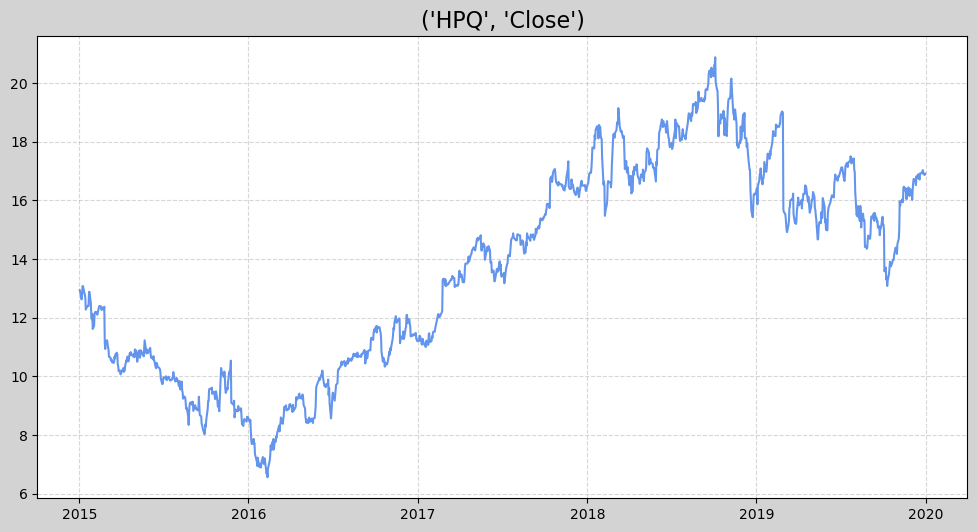

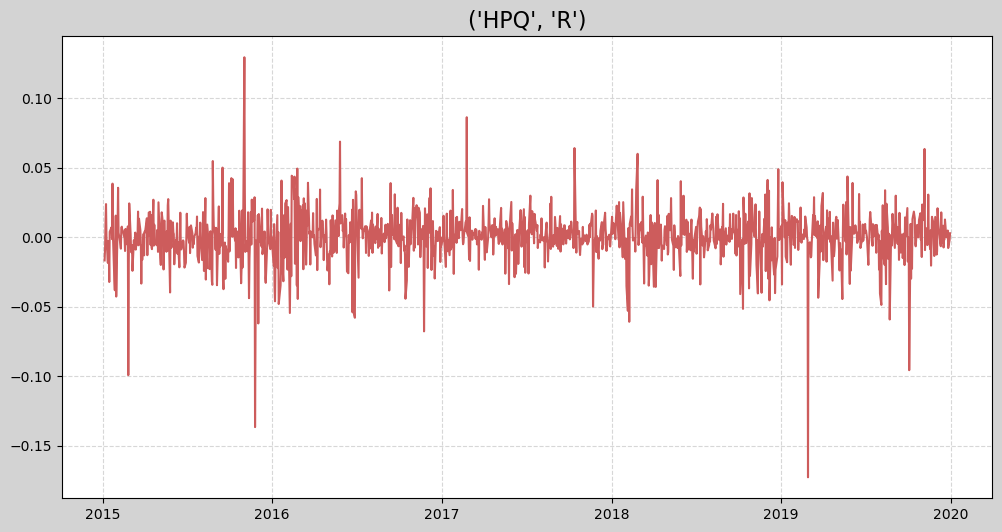

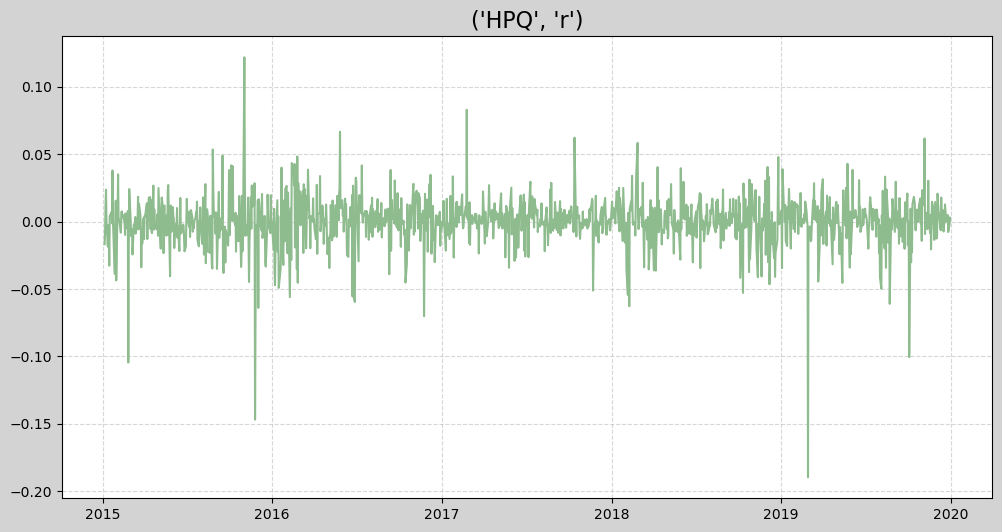

In [2]:
#%%Sample 1
# Download HPQ
ticker = "HPQ" # GOOG  #HPQ   #HPE
data=pd.DataFrame()
data['Close'] = yf.download(ticker, "2015-01-01", "2020-01-01")["Close"][ticker]

data["R"] = data.Close.pct_change()
data["r"] = np.log(data.Close)-np.log(data.Close.shift(1))

for i, colum in enumerate(data.columns):
     plt.figure()
     plt.plot(data[colum], color=colors[i])
     plt.title(f'{ticker, colum}')
     plt.show()

data = data.dropna()
a = data

[*********************100%***********************]  1 of 1 completed


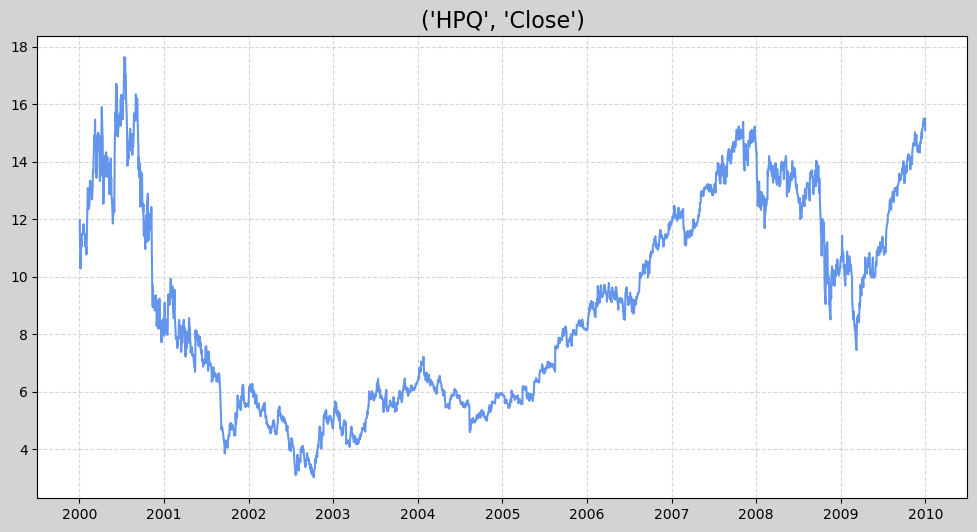

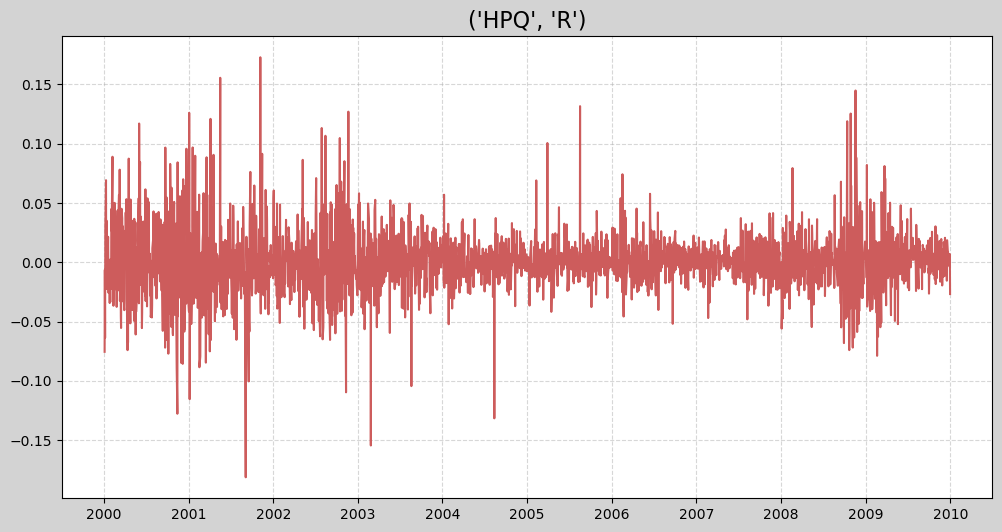

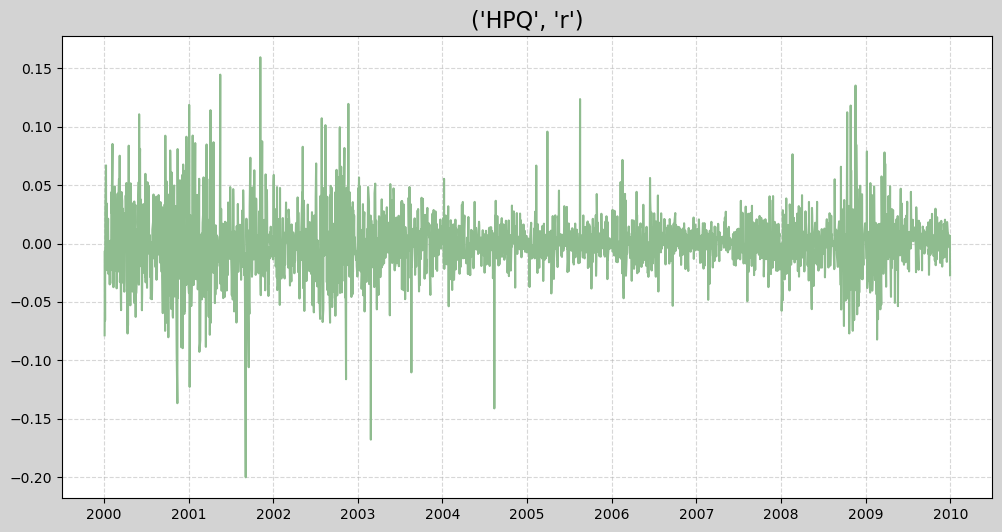

In [3]:
#%%Sample 2
#ticker = "HPQ" # GOOG  #HPQ   #HPE
# Download HPQ
ticker = "HPQ" # GOOG  #HPQ   #HPE
data=pd.DataFrame()
data['Close'] = yf.download(ticker, "2000-01-01", "2010-01-01")["Close"][ticker]

data["R"] = data.Close.pct_change()
data["r"] = np.log(data.Close)-np.log(data.Close.shift(1))

for i, colum in enumerate(data.columns):
     plt.figure()
     plt.plot(data[colum], color=colors[i])
     plt.title(f'{ticker, colum}')
     plt.show()

data = data.dropna()
b = data

In [4]:
#%%
a= a.dropna()
b= b.dropna()

'T-test, para probar medias'
alfa= 0.1
#Ho: son igual
#Ha: No son iguales


W, p2 = stats.levene(a.r, b.r)
if p2<alfa:
    print('Ho puede ser rechazada (No son iguales)')
else:
    print('Ho NO puede ser rechazada (Son iguales)')


Ho puede ser rechazada (No son iguales)


In [5]:
t, p = stats.ttest_ind(a.r, b.r, equal_var=True)

if p<alfa:
    print('Ho puede ser rechazada (No son iguales)')
else:
    print('Ho NO puede ser rechazada (Son iguales)')

Ho NO puede ser rechazada (Son iguales)


2025-09-11 21:11:41.793 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted cauchy distribution with error=178.533291)
2025-09-11 21:11:41.823 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted rayleigh distribution with error=5354.901524)
2025-09-11 21:11:41.827 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted uniform distribution with error=5743.134646)
2025-09-11 21:11:41.949 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted expon distribution with error=6336.708462)
2025-09-11 21:11:41.963 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted chi2 distribution with error=1218.06186)
2025-09-11 21:11:42.006 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted gamma distribution with error=1305.020708)
2025-09-11 21:11:42.010 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted exponpow distribution with error=3002.80345)
2025-09-11 21:11:42.072 | INFO     | fitter.fitter:_fit_single_distribu

r
{'cauchy': {'loc': 0.0009812424031860826, 'scale': 0.0077373278714200225}}
r
{'cauchy': {'loc': 0.000260790571437922, 'scale': 0.011664901928205188}}


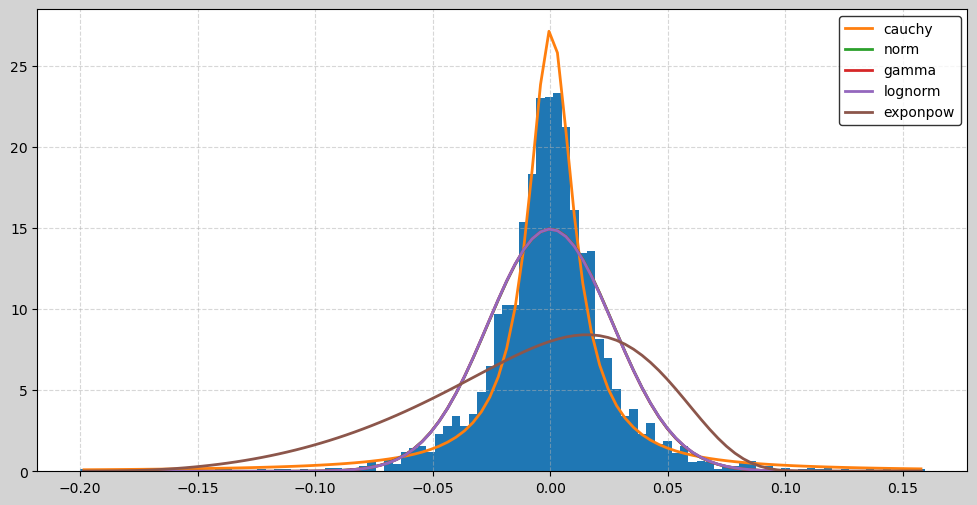

In [6]:
#%%
dist=get_common_distributions() #get_distributions()#get_common_distributions() 

f = Fitter(a.r,distributions=dist)
f.fit()

f.summary()
print ("r")
print(f.get_best())

f = Fitter(b.r,distributions=dist)
f.fit()

f.summary()
print ("r")
print(f.get_best())
 